# Examen número 2: 

### A)

1. Cree una función en Python que defina la función: 

\begin{equation}
f(\lambda)=\int_0^\infty \frac{\sin(\lambda x)}{\operatorname{e}^x}\operatorname{d}x
\end{equation}

2. Gráfique dicha función entre 0 y 100.

3. Haga un segundo gráfico añadiendo la derivada de la función

In [153]:
from scipy import integrate
import numpy as np
from matplotlib import pyplot as plt


### 1. Vamos a definir la función: 
Para esto vamos a usar el modulo integrate y especificamente haremos la integracion con quad.  

In [154]:
f_λ = lambda λ: integrate.quad(lambda x: np.sin(λ*x)/np.exp(x), 0, np.inf)[0]  
f_λ = np.vectorize(f_λ) # Vectorizamos la función

### 2. Graficamos la función para $\lambda$ entre 0 y 100 

c:\programas\pycharm\proyectos\proyecto_1\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
c:\programas\pycharm\proyectos\proyecto_1\venv\lib\site-packages\ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


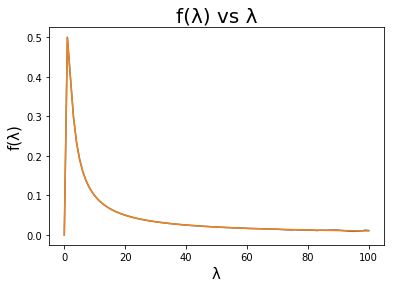

In [155]:
λ = np.linspace(0,100,100)
plt.plot(λ,f_λ(λ))
plt.xlabel('λ', size=15 )
plt.ylabel('f(λ)', size=15 )
plt.title('f(λ) vs λ',size=20)
plt.plot(λ,f(λ))


### 3. Hacemos un segundo gráfico añadiendo también la derivada de la función 

Para esto usaremos el modulo misc de simpy, la función derivative

In [173]:
from scipy.misc import derivative

def d_f(f,λ): # Creamos una función para evaluar la derivada en el punto
    return derivative(f, λ, dx=1e-6, args=())
d_f = np.vectorize(d_f)  # vectorizamos la función

c:\programas\pycharm\proyectos\proyecto_1\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
c:\programas\pycharm\proyectos\proyecto_1\venv\lib\site-packages\ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


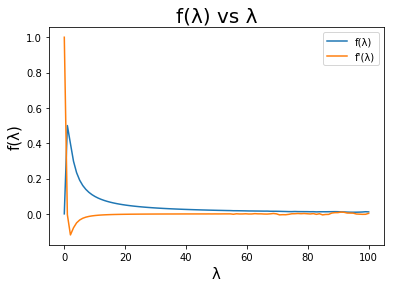

In [174]:
λ = np.linspace(0,100,100)
plt.plot(λ,f_λ(λ), label = 'f(λ)')
plt.plot(λ,d_f(f_λ,λ), label = "f'(λ)")
plt.xlabel('λ', size=15)
plt.ylabel('f(λ)', size=15)
plt.title('f(λ) vs λ',size=20)
plt.legend()

La gráfica se ve mejor en un intervalo más pequeño, ej [0-10]

c:\programas\pycharm\proyectos\proyecto_1\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


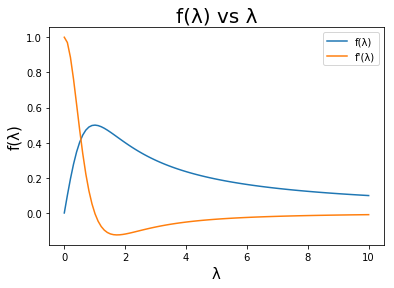

In [177]:
λ = np.linspace(0,10,100)
plt.plot(λ,f_λ(λ), label = 'f(λ)')
plt.plot(λ,d_f(f_λ,λ), label = "f'(λ)")
plt.xlabel('λ', size=15)
plt.ylabel('f(λ)', size=15)
plt.title('f(λ) vs λ',size=20)
plt.legend()

### B.
Construya una matriz aleatoria  $3\times 3 \boldsymbol{Y}$ y genere la matrix: 
\begin{equation}
\boldsymbol{A}=\boldsymbol{Y}^{\operatorname{T}}\boldsymbol{Y}
\end{equation}

1. Obtenga los autovalores y autovectores de $\boldsymbol{A}$ en orden ascendente en valor absoluto
2. Compruebe que los atovalores de  $\boldsymbol{Y}$ corresponden a la raíz cuadrado de los autovalores de $\boldsymbol{A}$ y explique porqué

### Vamos a crear la matriz aleatoria: 

In [324]:
import sympy
Y = np.random.rand(3,3)
sympy.Matrix(Y)

Matrix([
[0.137810600135306, 0.206654058136364,  0.440192725416788],
[0.475827343247868, 0.750422903287228, 0.0485102972502726],
[ 0.90678315860773, 0.860230921003884,  0.339329091406874]])

Creamos A multiplicando $Y^{T}Y$

In [325]:
A = Y.T@Y
sympy.Matrix(A)

Matrix([
[ 1.06765911882659,  1.16559376783562, 0.391443654839061],
[ 1.16559376783562,  1.34583767097345, 0.419272227995708],
[0.391443654839061, 0.419272227995708, 0.311267116724184]])

### 1. Vamos a obtener los autovalores y autovectores de A en orden ascendente de valor absoluto. Veamos que como A es producto de una matriz y su transpuesta, A es simetrica y podemos usar el teorema 1. 

In [326]:
# Definimos la función para obtener y ordenar los autovectores y los autovalores en orden ascendente de valor absoluto 
def argeig(A: 'numpy array or matrix'):
    
    def is_simetric(A: 'Numpy array or matrix'):
        return (A == A.T).all()
    
    if is_simetric(A) == True:
        λ,V=np.linalg.eig(A)
        index = np.abs(λ).argsort()
        λ = np.array([λ[i] for i in index])
        V = np.array([V[:,i] for i in index]).T
    
        return λ,V
    else:
        print('La matriz no es simétrica, no podemos aplicar el teorema')
        return np.nan,np.nan

In [327]:
λ , V = argeig(A) # obtenemos los autovalores y autovectores ordenados ascendentemente

In [328]:
sympy.Matrix(λ) # Mostramos los autovalores de A

Matrix([
[0.0314072234896333],
[  0.16446789932295],
[  2.52888878371164]])

In [329]:
sympy.Matrix(V) # Mostramos los autovectores de A

Matrix([
[ 0.760239715434438, -0.0867026328785634, 0.643830900569466],
[-0.641550521728295,  -0.256136511878084, 0.723053950513432],
[-0.102217919888428,   0.962744379747217, 0.250349268261024]])

### 2. Ahora obtengamos los autovalores de $Y$ y comparemos 

Y es una matriz arbritaria cualquiera y por lo tanto, no tiene por que ser simétrica. Vamos a usar el teorema 2 en este caso.
Construimos entonces una función para ordenar los autovalores y autovectores en orden ascendente. 

In [330]:
def argeig_general(A: 'numpy array or matrix'):
    
    V, λ, U_dagger = np.linalg.svd(A)
    index = np.abs(λ).argsort()
    U = U_dagger.T.conj()
    λ = np.array([λ[i] for i in index])
    V = np.array([V[:,i] for i in index]).T
    U = np.array([U[:,i] for i in index]).T

    return V,λ,U

In [331]:
V_y,λ_y,U_y = argeig_general(Y) # Calculamos los autovalores de Y con el teorema 2 y los ordenamos. 

In [332]:
sympy.Matrix(λ_y)  # Veamos los autovalores de Y

Matrix([
[0.177220832549769],
[0.405546420675797],
[ 1.59024802584743]])

In [333]:
sympy.Matrix(np.sqrt(λ))  # Ahora veamos la raiz cuadrada de los autovalores de A

Matrix([
[0.177220832549769],
[0.405546420675797],
[ 1.59024802584743]])

Evidentemente los autovalores de Y son la raíz cuadrada de los autovalores de A, vamos a explicar por que a continuación: 

Como tenemos que $A$ es el producto de una matriz transpuesta y su matriz respectivamente, por definición $A$ es diagonal. 
\begin{equation}
A = Y^{T}Y
\end{equation}

Por el teorema 1, $\exists V$ ortogonal, es decir, $V^{T} = V^{-1}$ tal que V diagonaliza a $A$, de la siguiente manera: 

\begin{equation}
V^{T}AV = A_{diag}  
\end{equation}

en donde $A_{diag} = diag(\lambda_{1},\lambda_{2},..,\lambda_{n})$ y $\lambda_{i}$ el autovalor i-ésimo de $A$. Multiplicando a izquierda por $V$ y a derecha por $V_{T}$ se tiene que :


\begin{equation}
VV^{T}AVV^{T} = A = VA_{diag}V^{T}  
\end{equation}

Igualando con la primera expresión: 

\begin{equation}
A = VA_{diag}V^{T}  = Y^{T}Y 
\end{equation}

sea $D_{\sqrt(\lambda)}$ = $diag(\sqrt{\lambda_{1}}, \sqrt{\lambda_{2}},...,\sqrt{\lambda_{n}} )$ de modo que:  

\begin{equation}
D_{\sqrt(\lambda)} D_{\sqrt(\lambda)}= A_{diag}
\end{equation}
es decir,  $D_{\sqrt(\lambda)}$ es la raíz de los autovalores de A. 
Reemplazando esto en las expresiones anteriores se tiene que: 

\begin{equation}
 VD_{\sqrt(\lambda)} D_{\sqrt(\lambda)}V^{T}  = Y^{T}Y 
\end{equation}

Sea R cualquier matriz ortogonal, tenemos que $RR^{T}=I$ y añadiendolo a la ecuación anterior: 

\begin{equation}
 VD_{\sqrt(\lambda)} R^{T}R D_{\sqrt(\lambda)}V^{T}  = Y^{T}Y 
\end{equation}


Y recordemos que $(ABC)^{T} = C^{T} B^{T} A^{T}$ y que como $D_{\sqrt(\lambda)}$ es diagonal, $D_{\sqrt(\lambda)}^{T} = D_{\sqrt(\lambda)}$ : 


\begin{equation}
 (R D_{\sqrt(\lambda)}V^{T})^{T} R D_{\sqrt(\lambda)}V^{T}  = Y^{T}Y 
\end{equation}

Aqui tenemos entonces inmediatamente que :

\begin{equation}
Y = R D_{\sqrt(\lambda)}V^{T}
\end{equation}

\begin{equation}
R^{T} Y V= D_{\sqrt(\lambda)}
\end{equation}

Como $R$ y $V$ son ortogonales, sabemos por teorema 2 que $D_{\sqrt(\lambda)}$ son los autovalores de $Y$, pero recordemos que habiamos definido $D_{\sqrt(\lambda)}$ como la raiz cuadrada de los autovalores de A, luego se demuestra la relación. 